In [1]:
from pycocotools.coco import COCO

In [3]:
dataset_dir = '/data/public/MSCOCO'
subset = 'train'
year = 2017
coco = COCO(
            "{}/annotations/instances_{}{}.json".format(dataset_dir, subset,
                                                        year))
class_ids = sorted(coco.getCatIds())

loading annotations into memory...
Done (t=15.18s)
creating index...
index created!


In [4]:
image_dir = "{}/{}{}".format(dataset_dir, subset, year)

In [5]:
class_ids = sorted(coco.getCatIds())

In [7]:
image_ids = []
for id in class_ids:
    image_ids.extend(list(coco.getImgIds(catIds=[id])))
# Remove duplicates
image_ids = list(set(image_ids))

In [8]:
len(image_ids)

117266

In [9]:
for i in image_ids:
    anns = coco.loadAnns(coco.getAnnIds(
        imgIds=[i], catIds=class_ids,
        areaRng=[2000, float('inf')],
        iscrowd=None))
    for j, ann in enumerate(anns):
        self.add_image(
            "coco", image_id=i,
            path=os.path.join(image_dir, coco.imgs[i]['file_name']),
            width=coco.imgs[i]["width"],
            height=coco.imgs[i]["height"],
            annottion_id=j,
            ann=ann)

NameError: name 'self' is not defined

In [15]:
image_id=9
import os
image_path = os.path.join(image_dir, coco.imgs[image_id]['file_name'])

In [16]:
anns = coco.loadAnns(coco.getAnnIds(
                imgIds=[image_id], catIds=class_ids,
                areaRng=[2000, float('inf')],
                iscrowd=None))

In [18]:
anns[0]

{'area': 120057.13925,
 'bbox': [1.08, 187.69, 611.59, 285.84],
 'category_id': 51,
 'id': 1038967,
 'image_id': 9,
 'iscrowd': 0,
 'segmentation': [[500.49,
   473.53,
   599.73,
   419.6,
   612.67,
   375.37,
   608.36,
   354.88,
   528.54,
   269.66,
   457.35,
   201.71,
   420.67,
   187.69,
   389.39,
   192.0,
   19.42,
   360.27,
   1.08,
   389.39,
   2.16,
   427.15,
   20.49,
   473.53]]}

In [22]:
from pycocotools import mask as maskUtils

def annToRLE(ann, height, width):
    """
    Convert annotation which can be polygons, uncompressed RLE to RLE.
    :return: binary mask (numpy 2D array)
    """
    segm = ann['segmentation']
    if isinstance(segm, list):
        # polygon -- a single object might consist of multiple parts
        # we merge all parts into one mask rle code
        rles = maskUtils.frPyObjects(segm, height, width)
        rle = maskUtils.merge(rles)
    elif isinstance(segm['counts'], list):
        # uncompressed RLE
        rle = maskUtils.frPyObjects(segm, height, width)
    else:
        # rle
        rle = ann['segmentation']
    return rle

def annToMask(ann, height, width):
    """
    Convert annotation which can be polygons, uncompressed RLE, or RLE to binary mask.
    :return: binary mask (numpy 2D array)
    """
    rle = annToRLE(ann, height, width)
    m = maskUtils.decode(rle)
    return m

In [24]:
object_mask=annToMask(anns[0], coco.imgs[image_id]['height'], coco.imgs[image_id]['width'])

In [26]:
import numpy as np
object_mask[object_mask > 0] = 1  # fineSize x fineSize
object_pixels = np.where(object_mask != 0)
bbox = np.min(object_pixels[0]), np.max(object_pixels[0]), \
       np.min(object_pixels[1]), np.max(object_pixels[1])

object_x = bbox[2]
object_y = bbox[0]
object_height = bbox[1] - object_y + 1
object_width = bbox[3] - object_x + 1

In [30]:
object_height

286

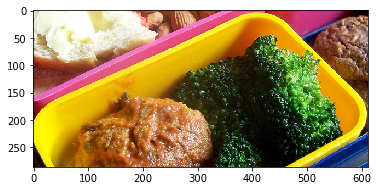

In [35]:
import skimage.io
%matplotlib inline
import matplotlib.pyplot as plt
image = skimage.io.imread(os.path.join(image_dir, coco.imgs[image_id]['file_name']))
imgplot = plt.imshow(image[object_y:object_y+object_height, object_x:object_x+object_width, :])

In [36]:
object_mask.shape

(480, 640)

In [37]:
 object_mask = object_mask[object_y:object_y+object_height, object_x: object_x+object_width]

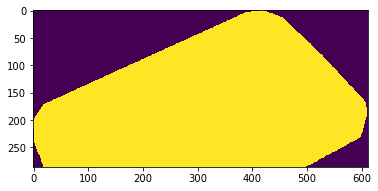

In [38]:
imgplot = plt.imshow(object_mask)

In [40]:
instance_masks = [object_mask]
mask = np.stack(instance_masks, axis=2)
class_ids = np.empty([1], np.int32)

In [41]:
mask.shape

(286, 612, 1)